# Image Compression using K-means Clustering

### 1 - K-means clustering implementation using numpy

#### 1.1 Importing Libraries

In [1]:
# import required libraries
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### 1.2 Process of K-means 

- Randomly initialize K centroids from data 
- Find the centroid near to each data point
- Calculate the mean of all points corresponding to each centroid and move the centroid to that position
- Calculate the Distortion cost 
- Then Repeat the process from step 2 until the cost stops decreasing (It should not increase)

#### 1.3 Function for finding nearest centroids for each data point (`x[i]`)

In [2]:
def find_closest_centroids(x, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        x (ndarray): (m, n) Input values      
        centroids (ndarray): (k, n) k centroids 
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """
    K = centroids.shape[0]
    
    idx = np.zeros(x.shape[0],dtype=int)
    
    for i in (range(x.shape[0])):
        dist = np.zeros(K)
        for j in range(K):
            dist[j] = np.linalg.norm(x[i]-centroids[j])
        idx[i] = np.argmin(dist)
    
    return(idx)

#### 1.4 Computing means for each centroid

In [3]:
def compute_centroids(x, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                    example in X. Concretely, idx[i] contains the index of 
                    the centroid closest to example i
        K (int):     number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    m,n = np.shape(x)
    
    centroids = np.zeros((K,n))
    
    weights = np.zeros(K)
    
    for i in (range(m)):
        centroids[idx[i]] = centroids[idx[i]] + x[i]
        weights[idx[i]] = weights[idx[i]] + 1
    
    for k in range(K):
        centroids[k] = centroids[k]/weights[k]
        
    return centroids

#### 1.5 Random initialization of K centroids from data

In [4]:
def random_init(x,k):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    randomindex = np.random.permutation(x.shape[0])
    centroids = x[randomindex[:k]]
    return centroids

#### 1.6 Running K means 

In [31]:
def run_kMeans(x, k, no_of_iters):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    
    k is number of desired clusters 
    
    no_of_iters is number of iterations to run the algorithm
    """
    # m,n = np.shape(x)
    
    centroids = random_init(x,k)
    
    for i in (range(no_of_iters)):
        print(f"K-Means iteration {i}/{no_of_iters}")
        idx = find_closest_centroids(x, centroids)
        centroids = compute_centroids(x,idx,k)
    return centroids,idx

### 2 - Image compression with K-means

#### 2.1 Read the Image

In [38]:
IMG_PATH = "bird.jpg"

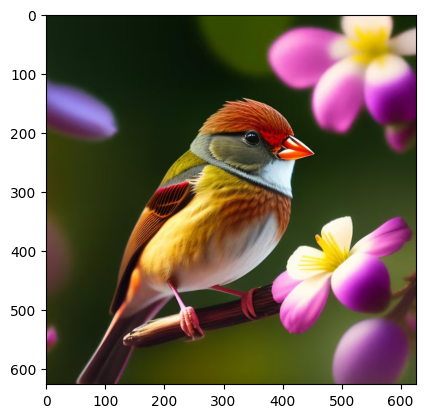

In [39]:
original_img = plt.imread(IMG_PATH)
plt.imshow(original_img)

#### 2.2 Normalize and reshape the image

In [40]:
print("Shape of original_img is:", original_img.shape)
original_img = original_img / 255
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

Shape of original_img is: (626, 626, 3)


#### 2.3 Running K-means for desired number of centroids and number of iterations

In [ ]:
k = 50
max_iters = 50
initial_centroids = random_init(X_img, k)
centroids,idx = run_kMeans(X_img, k, max_iters)

#### 2.4 Retrieve the Image from returned data

In [ ]:
X_recovered = centroids[idx, :] 
X_recovered = np.reshape(X_recovered, original_img.shape) 
X_recovered = np.round(X_recovered)

#### 2.5 Display Compressed Image

Text(0.5, 1.0, 'Original')

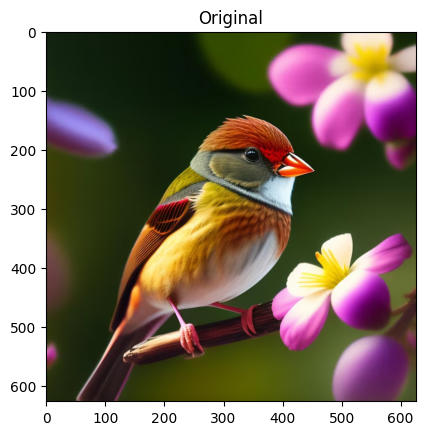

In [42]:
# original_img = np.round(original_img)
plt.imshow(original_img)
plt.title("Original")

Text(0.5, 1.0, 'Compressed with 50 colours')

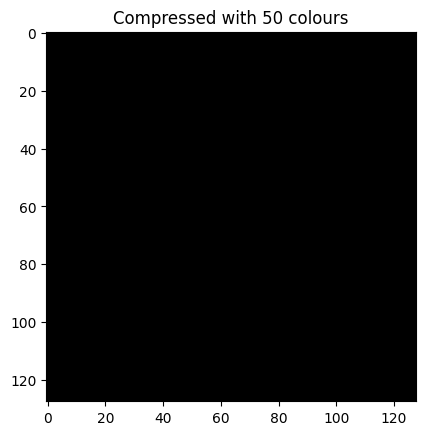

In [43]:
# Display compressed image
plt.imshow(X_recovered*255)
plt.title('Compressed with %d colours'%k)